### 1. Scatter plot 

In [1]:
#Set up
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings; warnings.filterwarnings(action='once')

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

In [4]:
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline
#confirm verson
print(mpl.__version__) 
print(sns.__version__) 

3.7.1
0.12.2


/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_30156/4140691928.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [5]:
#import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3045,WALWORTH,WI,0.032,75000,2343.750000,72747,454,201,494,...,6.082324,71553,95.404000,9.641804,8.699613,10.926610,6.894182,0,AAR,387.490366
328,3046,WASHBURN,WI,0.050,13772,275.440000,13585,25,122,33,...,4.022803,13532,98.257334,15.866095,21.418598,13.642483,14.329455,0,AAR,124.233095
329,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR,219.578698
330,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR,155.859825


In [14]:
# create the same amount of color as the unique midwest['category']
n_category=np.unique(midwest['category'])
n_category

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [11]:
colors = [plt.cm.tab10(i/float(len(n_category)-1)) for i in range(len(n_category))]

/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_30156/429636147.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('area','poptotal',


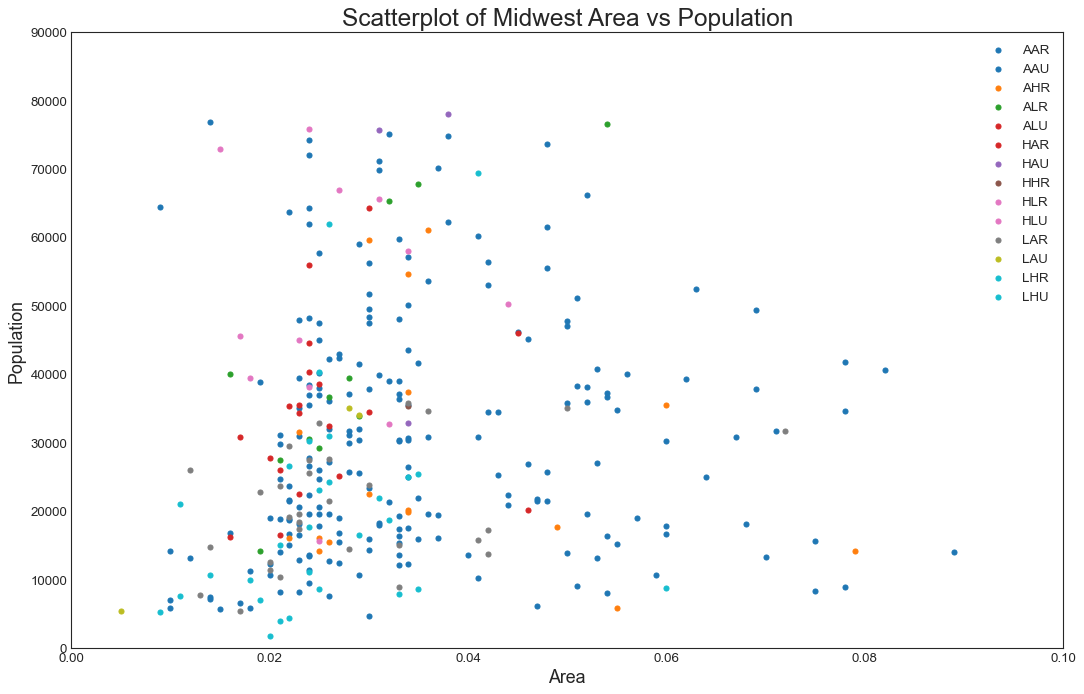

In [15]:
# Draw plot for each category 
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(n_category):
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=colors[i],label=str(category))
# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()     